<a href="https://colab.research.google.com/github/JhonyVillacis/DataScience/blob/main/CRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**REDES NEURONALES CONVOLUCIONALES**


In [7]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

Comprobar version de Librerias

In [9]:
print("Versión tf:",tf.__version__)

Versión tf: 2.3.0


In [8]:
# Importar MNIST dataset
from tensorflow.keras.datasets import mnist

In [10]:
#Instancia para descargar dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#Tratamiento y escalamiento de imágenes entrenamiento
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

#Tratamiento y escalamiento de imágenes prueba
test_images  = test_images.reshape((10000, 28, 28, 1))
test_images  = test_images.astype('float32') / 255

#Tratamiento variable objetivo
train_labels = to_categorical(train_labels)
test_labels  = to_categorical(test_labels)

11493376/11490434 [==============================] - 0s 0us/step


In [11]:
test_labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Visualizacion de un Ejemplo

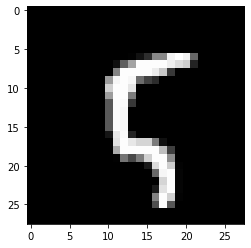

In [12]:
plt.imshow(train_images[100,:,:,0], cmap='gray')
plt.show()
display()

In [13]:
# Crear un modelo
model = Sequential()
# Añadir capas Conv2D y MaxPooling2D

# Añade una capa de convolución 2D, con 32 filtros. Cada filtro es de 3x3
# se aplica una activación RELU a la salida y el tamaño de la entrada es de
# 28x28x1 es decir 28 de altura, 28 de ancho y 1 canal (MNIST es escalas de grises)
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))


# Se hace Max Pooling reduciendo a la mitad la dimensión espacial
model.add(layers.MaxPooling2D((2, 2)))


# Añade una capa de convolución 2D, con 64 filtros. Cada filtro es de 3x3
# se aplica una activación RELU a la salida
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


# Se hace Max Pooling reduciendo a la mitad la dimensión espacial
model.add(layers.MaxPooling2D((2, 2)))


# Añade una capa de convolución 2D, con 64 filtros. Cada filtro es de 3x3
# se aplica una activación RELU a la salida
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


# Para continuar con clasificación multi-clase hay que utilizar capas Dense
# Para esto los datos debe ser convertidos a una sola dimensión usando la capa Flatten()
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))


# La capa final corresponde a la salida. Una por cada clase
# La activación Softmax permite calcular la probabilidad de cada clase (digitos del 0 al 9)
model.add(layers.Dense(10, activation='softmax'))


# Vemos información sumaria del modelo
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [14]:
train_labels.shape

(60000, 10)

In [15]:
train_images.shape

(60000, 28, 28, 1)

In [16]:
# Compilamos el modelo especificando el algoritmo de optimización, la función de pérdida y las métricas
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento. Esto tomará algún tiempo
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 50s 53ms/step - loss: 0.1897 - accuracy: 0.9423
Epoch 2/5
938/938 [==============================] - 50s 54ms/step - loss: 0.0533 - accuracy: 0.9834
Epoch 3/5
938/938 [==============================] - 50s 53ms/step - loss: 0.0377 - accuracy: 0.9880
Epoch 4/5
938/938 [==============================] - 50s 53ms/step - loss: 0.0304 - accuracy: 0.9906
Epoch 5/5
938/938 [==============================] - 50s 53ms/step - loss: 0.0238 - accuracy: 0.9926


In [17]:
# Finalmente evaluamos en la data de testing
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Pérdida (testing) = {:.2f}, accuracy (testing) = {:.2f}'.format(test_loss, test_acc))

313/313 [==============================] - 3s 10ms/step - loss: 0.0302 - accuracy: 0.9913
Pérdida (testing) = 0.03, accuracy (testing) = 0.99


***En Conclusion no existe Overfiting y hay un performance muy bueno del modelo***